In [1]:
#### Importing package dependencies
import sys, os,math
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
from datetime import datetime
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
########## Reading visits.csv from monthly directories into a data frame
dir_list = [x[0] for x in os.walk('./Data/') ]

df = pd.concat(map(pd.read_csv, [dr+'/visits.csv' for dr in dir_list[1:]]))

df

,patient_id,medical_id,gender,entry_unit,entry_group,first_department,first_ward,entry_date,hospitalization_date,exit_date,...,hospitalization_time,exit_day,exit_time,ED_dur,ED_dur_hours,hospitalization_dur,hospitalization_dur_hours,hospitalization_dur_days,age,num_dep
0,10000047,20681518,2,12,2,62,62,02/09/06 09:41:59,02/09/06 09:41:59,02/09/06 10:35:00,...,1139478119,13188,1139481300,0,0,3181,0,0,66,1
1,10000053,20680029,2,12,2,62,62,02/01/06 08:13:25,02/01/06 08:13:25,02/01/06 10:54:18,...,1138781605,13180,1138791258,0,0,9653,2,0,60,1
2,10000073,20180733,2,11,1,11,77,02/13/06 22:40:33,02/13/06 23:55:00,02/15/06 10:50:45,...,1139874900,13194,1140000645,4467,1,125745,34,1,28,2
3,10000083,20648418,2,12,2,78,78,02/16/06 10:58:11,02/16/06 10:58:11,02/16/06 12:30:00,...,1140087491,13195,1140093000,0,0,5509,1,0,46,1
4,10000090,20062089,2,1,1,1,43,02/08/06 11:14:33,02/08/06 17:10:05,02/15/06 14:50:00,...,1139418605,13194,1140015000,21332,5,596395,165,6,67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13466,10310380,20688790,1,12,2,88,88,08/29/07 10:01:57,08/29/07 10:01:57,08/31/07 15:00:00,...,1188381717,13756,1188572400,0,0,190683,52,2,77,1
13467,10310530,20689657,1,12,2,88,88,08/25/07 20:05:37,08/25/07 20:05:37,08/27/07 16:00:00,...,1188072337,13752,1188230400,0,0,158063,43,1,77,1
13468,10310569,20689801,1,12,2,88,88,08/29/07 10:41:43,08/29/07 10:41:43,08/31/07 15:00:00,...,1188384103,13756,1188572400,0,0,188297,52,2,87,1
13469,10310574,20689825,1,12,2,88,88,08/29/07 11:09:24,08/29/07 11:09:24,08/31/07 15:00:00,...,1188385764,13756,1188572400,0,0,186636,51,2,73,1


In [3]:
###### converting date to a datetime64
df['entry_date']= df['entry_date'].astype('datetime64[s]')

In [4]:
## Selecting the date range to analyse


start = '01-01-2004'
# end = '11-01-2007'
end = '01-01-2007'

df_sub = df[df['entry_date'].between(start, end, inclusive=False)]
idx = pd.date_range(start,end,freq = 'H')

In [5]:
##### Round to hourly entries and count per hour

df_sub['hour'] = (df_sub['entry_date'].dt.round('H'))
df_sub = df_sub.groupby(['hour']).size().reset_index(name='Number of Patients')

In [6]:
## Add rows with hours that have no arrivals

df_sub.index = pd.DatetimeIndex(df_sub['hour'])
df_sub = df_sub.reindex(idx, fill_value=0).drop(columns=['hour'])
df_sub.index.name = 'hour'
df_sub = df_sub.reset_index()
df_sub['hour'] = pd.to_datetime(df_sub['hour'])
df_sub

,hour,Number of Patients
0,2004-01-01 00:00:00,5
1,2004-01-01 01:00:00,11
2,2004-01-01 02:00:00,8
3,2004-01-01 03:00:00,4
4,2004-01-01 04:00:00,5
...,...,...
26300,2006-12-31 20:00:00,16
26301,2006-12-31 21:00:00,23
26302,2006-12-31 22:00:00,18
26303,2006-12-31 23:00:00,14


In [7]:
## hours with no patients
df_sub[df_sub['Number of Patients']==0]

,hour,Number of Patients
29,2004-01-02 05:00:00,0
339,2004-01-15 03:00:00,0
438,2004-01-19 06:00:00,0
677,2004-01-29 05:00:00,0
797,2004-02-03 05:00:00,0
...,...,...
24988,2006-11-07 04:00:00,0
25180,2006-11-15 04:00:00,0
25493,2006-11-28 05:00:00,0
25614,2006-12-03 06:00:00,0


In [8]:
##### Creating features from the date column

## HOD: Hour Of Day
## month
## year
## day
## DOW: Day Of Week
## DOY: Day Of Year
## WOY: Week Of Year
## QOD: Quarter Of Day
## HOW: Hour Of Week

df_sub['HOD']=df_sub['hour'].dt.hour
df_sub['month']=df_sub['hour'].dt.month
df_sub['year']=df_sub['hour'].dt.year
df_sub['day']=df_sub['hour'].dt.day
df_sub['DOW']=df_sub['hour'].dt.day_name()
df_sub['DOY']=df_sub['hour'].dt.dayofyear
df_sub['WOY']=df_sub['hour'].dt.isocalendar().week
df_sub['QOD']=(df_sub['HOD']/6).apply(np.floor)
df_sub['HOW'] = df_sub['hour'].dt.dayofweek * 24 + (df_sub['hour'].dt.hour + 1)

df_sub = df_sub[['hour','year','month','day','HOD','DOW','DOY','WOY','QOD','HOW','Number of Patients']]
df_sub

,hour,year,month,day,HOD,DOW,DOY,WOY,QOD,HOW,Number of Patients
0,2004-01-01 00:00:00,2004,1,1,0,Thursday,1,1,0.0,73,5
1,2004-01-01 01:00:00,2004,1,1,1,Thursday,1,1,0.0,74,11
2,2004-01-01 02:00:00,2004,1,1,2,Thursday,1,1,0.0,75,8
3,2004-01-01 03:00:00,2004,1,1,3,Thursday,1,1,0.0,76,4
4,2004-01-01 04:00:00,2004,1,1,4,Thursday,1,1,0.0,77,5
...,...,...,...,...,...,...,...,...,...,...,...
26300,2006-12-31 20:00:00,2006,12,31,20,Sunday,365,52,3.0,165,16
26301,2006-12-31 21:00:00,2006,12,31,21,Sunday,365,52,3.0,166,23
26302,2006-12-31 22:00:00,2006,12,31,22,Sunday,365,52,3.0,167,18
26303,2006-12-31 23:00:00,2006,12,31,23,Sunday,365,52,3.0,168,14


<AxesSubplot:xlabel='HOD', ylabel='Number of Patients'>

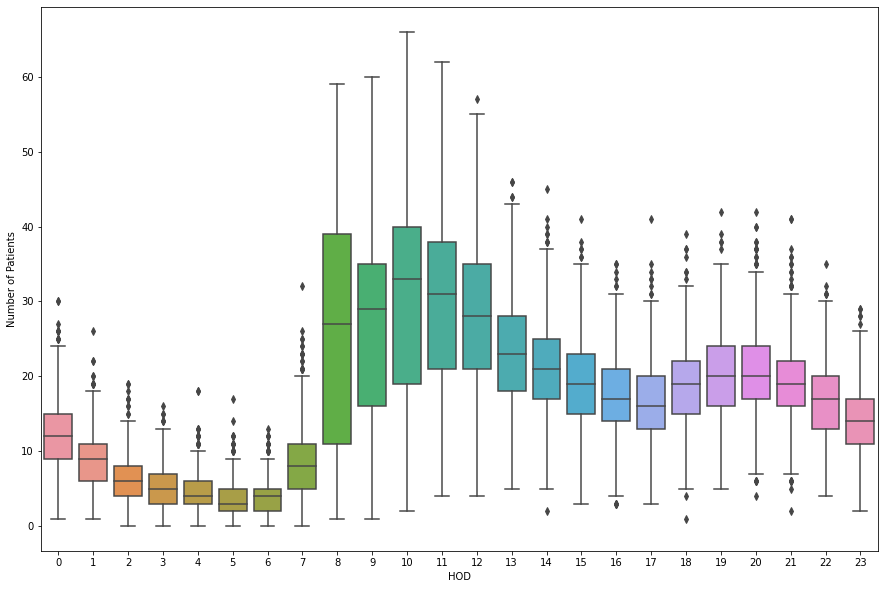

In [9]:
## Looking at trend for Hour Of Day
sns.boxplot(x="HOD",y="Number of Patients",data=df_sub)

<AxesSubplot:xlabel='QOD', ylabel='Number of Patients'>

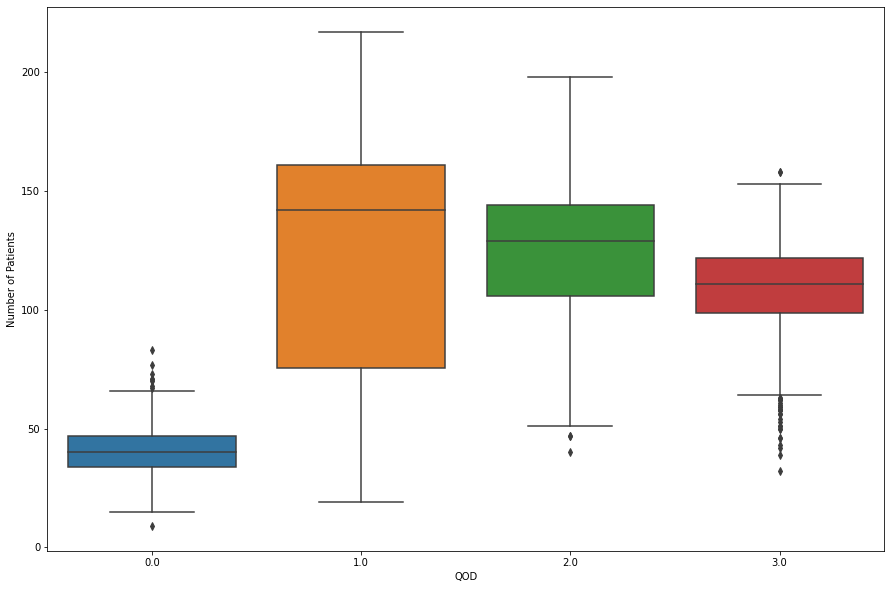

In [10]:
## Looking at trend for Quarter Of Day

df_QOD = df_sub.groupby(['QOD','DOY','year'])['Number of Patients'].sum().reset_index(name='Number of Patients')
sns.boxplot(x="QOD",y="Number of Patients",data=df_QOD)

<AxesSubplot:xlabel='DOW', ylabel='Number of Patients'>

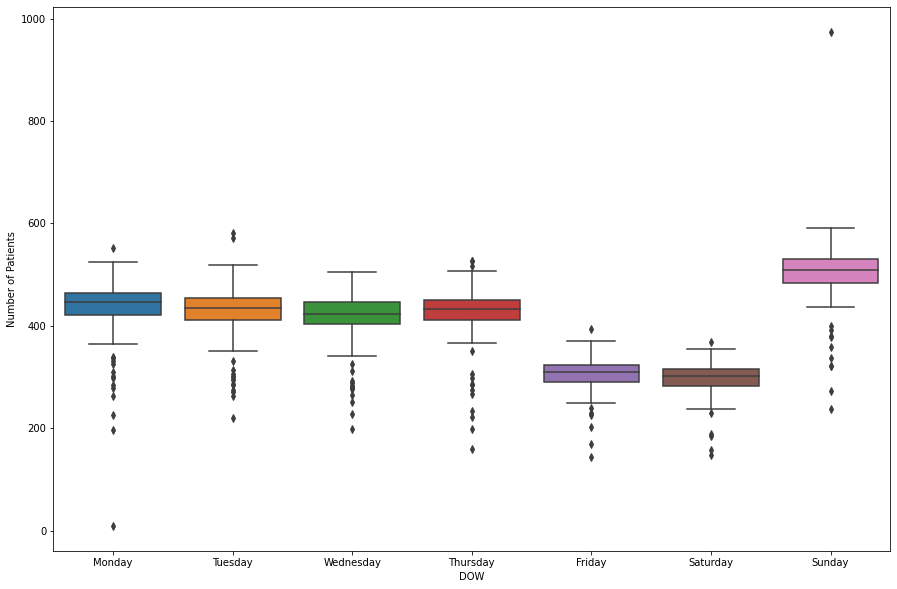

In [11]:
## Looking at trend for Day Of Week

df_DOW = df_sub.groupby(['DOW','WOY','year'])['Number of Patients'].sum().reset_index(name='Number of Patients')
sns.boxplot(x="DOW",y="Number of Patients",data=df_DOW,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

<AxesSubplot:xlabel='month', ylabel='Number of Patients'>

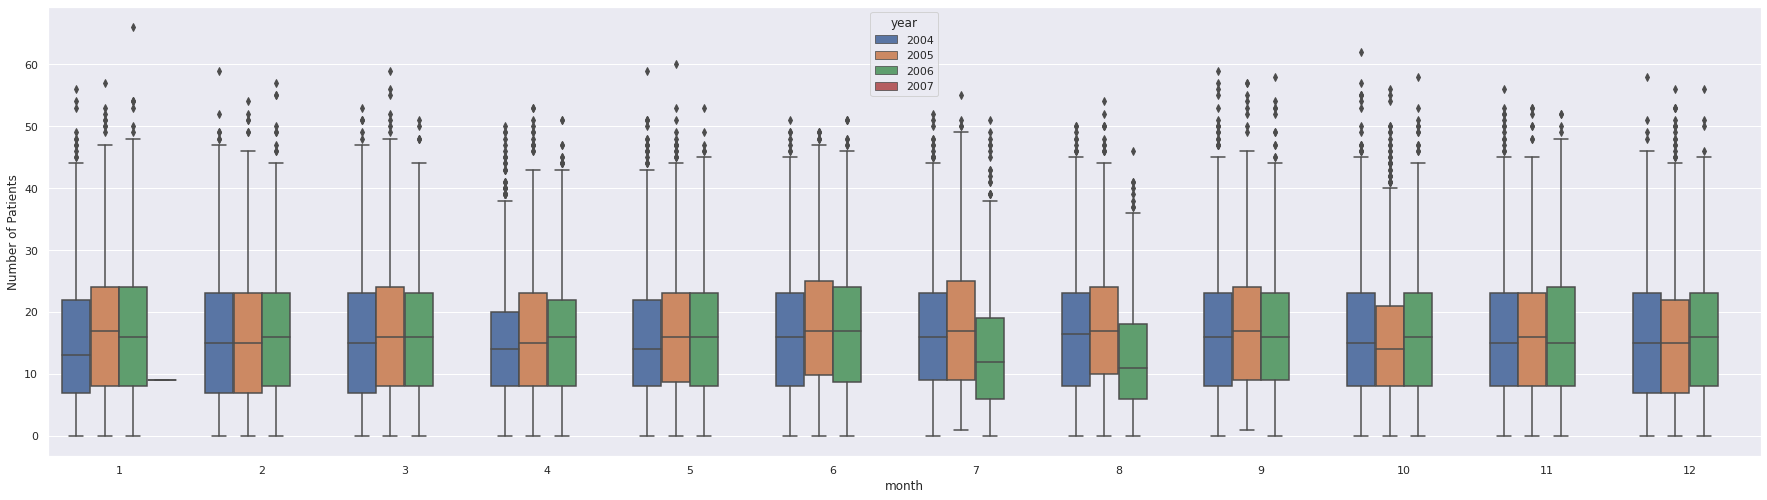

In [17]:
## Looking at trend for Month of the year

df_month = df_sub.groupby(['month','year'])['Number of Patients'].sum().reset_index(name='Number of Patients')
sns.boxplot(x="month",y="Number of Patients",hue='year',data=df_sub)

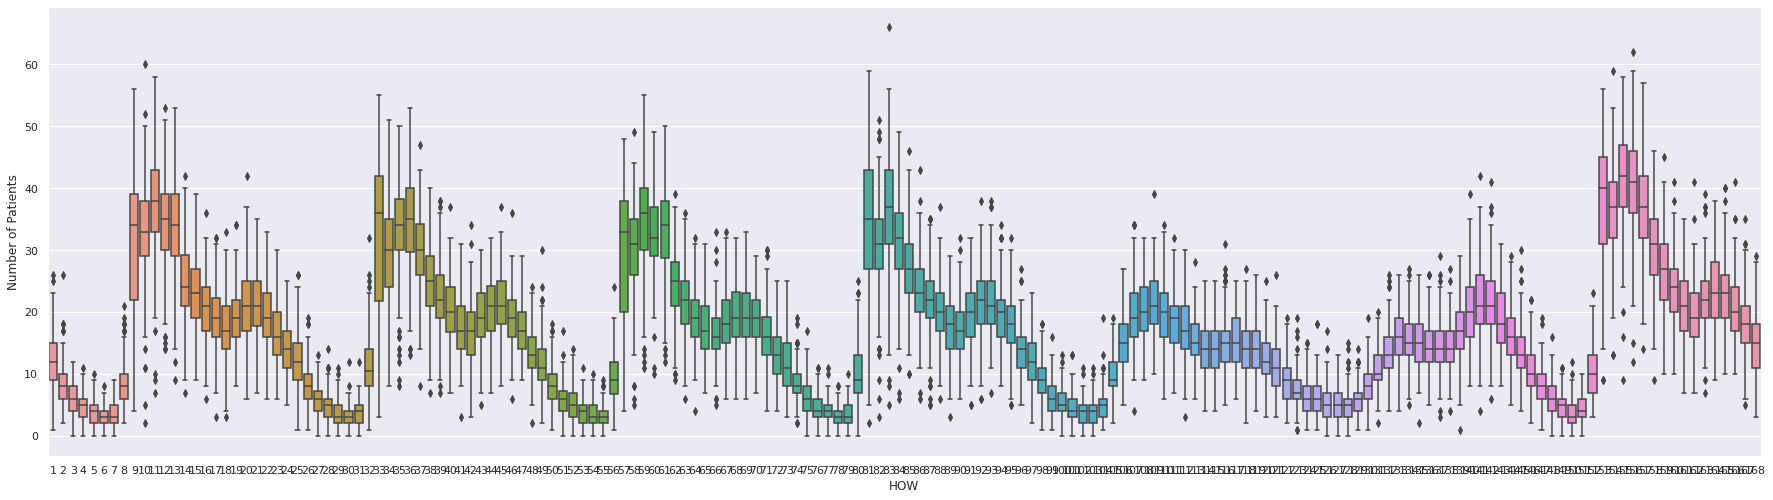

In [13]:
## Looking at trend for Hour Of Week

sns.set(rc={'figure.figsize':(30.7,8.27)})
df_HOW = df_sub.groupby(['HOW','WOY'])['Number of Patients'].sum().reset_index(name='Number of Patients')
sns.boxplot(x="HOW",y="Number of Patients",data=df_sub)
plt.savefig('HOW.png')

<AxesSubplot:xlabel='WOY', ylabel='Number of Patients'>

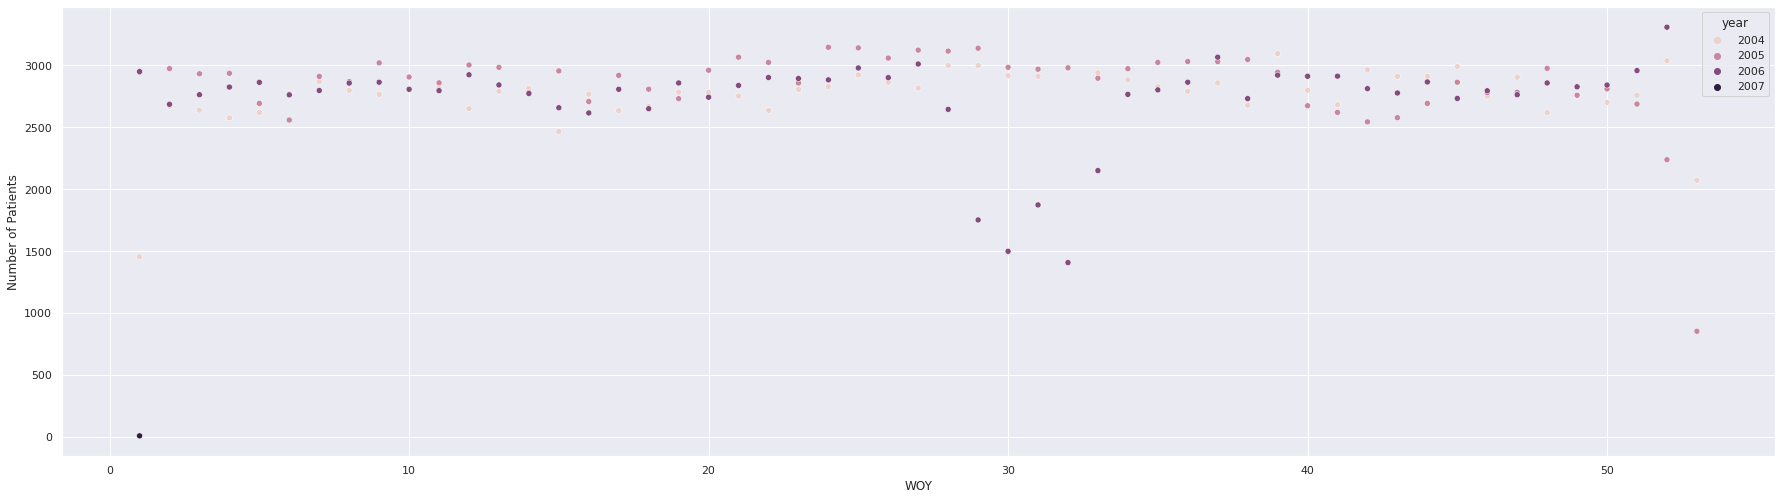

In [14]:
## Looking at trend for Week of Year

df_month = df_sub.groupby(['WOY','year'])['Number of Patients'].sum().reset_index(name='Number of Patients')
sns.scatterplot(x="WOY",y="Number of Patients",hue='year',data=df_month)

In [15]:
## Exporting hourly data

df_sub.to_csv('hourly.csv')